<br><br>
<font size = "6">
<b>Assignment</b>
</font>


<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

# Open Data Set

- We will use open dataset to apply what we have learned.


- The open dataset which we will use for regression is 'Weather in Szeged 2006 - 2016' from kaggle.
 - Is there a relationship between humidity and temperature? 
 - What about between humidity and apparent temperature? 

- You can download the dataset from below url but already included in 'data_files/weatherHistory.csv'.

 - https://www.kaggle.com/budincsevity/szeged-weather/version/1#weatherHistory.csv




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## 1. Data load (5pt)
**Read the file 'weatherHistory.csv' and show top 5 rows using the pandas module**

In [2]:
Weather = pd.read_csv('./weatherHistory.csv')
Weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 2. Data Drop (5pt)
**Delete 5 columns**
- 'Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'

In [3]:
Weather_drop = Weather.drop(['Formatted Date', 'Summary', 'Precip Type', 'Loud Cover', 'Daily Summary'],axis=1)
Weather_drop.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


## 3. Data Plotting (5pt)
**Visualize column 'Apparent Temperature (C)' using matplotlib module**

In [4]:
np.arange(0, len(Weather['Apparent Temperature (C)']))

array([    0,     1,     2, ..., 96450, 96451, 96452])

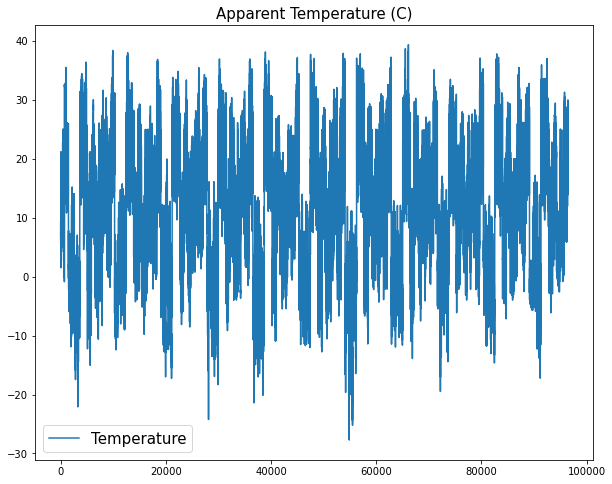

In [5]:
plt.figure(figsize = (10, 8))
plt.title("Apparent Temperature (C)", fontsize = 15)
plt.plot(np.arange(0, len(Weather['Apparent Temperature (C)'])), Weather['Apparent Temperature (C)'], label = 'Temperature')
plt.legend(fontsize=15)

## 4. Data Sorting (5pt)
**Sort in ascending order by the column 'Apparent Temperature (C)'**

In [6]:
Weather_drop['Apparent Temperature (C)']

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [7]:
Weather_drop = Weather_drop.sort_values(by = 'Apparent Temperature (C)', ascending=True, axis = 0)
Weather_drop.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
54864,-20.000000,-27.716667,0.78,11.2700,20.0,0.0000,1033.30
54845,-20.000000,-26.227778,0.82,8.0500,340.0,1.4490,1032.60
54866,-20.555556,-25.922222,0.78,6.4400,30.0,1.4490,1032.10
55489,-20.050000,-25.200000,0.78,6.2146,170.0,1.7066,1034.74
55492,-20.277778,-25.072222,0.79,5.6672,158.0,1.8032,1033.53


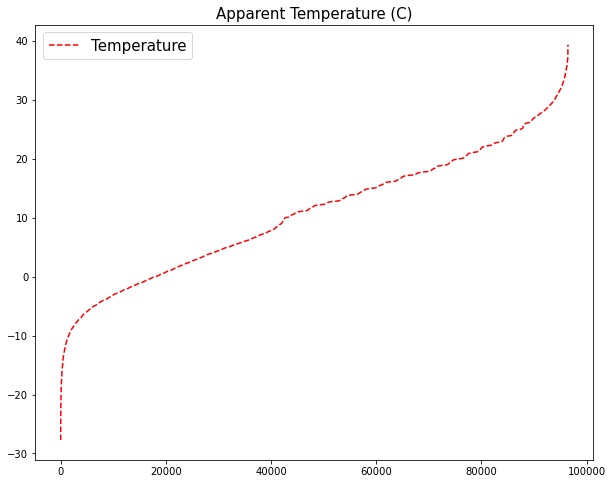

In [8]:
plt.figure(figsize = (10, 8))
plt.title("Apparent Temperature (C)", fontsize = 15)
plt.plot(np.arange(0, len(Weather_drop['Apparent Temperature (C)'])), Weather_drop['Apparent Temperature (C)'], 'r--', label = 'Temperature')
plt.legend(fontsize=15)

## 5. Feature Selection (5 pt)
**split train and target columns**
- target column: Apparent Temperature
- train columns: else

In [9]:
Weather_drop.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
54864,-20.000000,-27.716667,0.78,11.2700,20.0,0.0000,1033.30
54845,-20.000000,-26.227778,0.82,8.0500,340.0,1.4490,1032.60
54866,-20.555556,-25.922222,0.78,6.4400,30.0,1.4490,1032.10
55489,-20.050000,-25.200000,0.78,6.2146,170.0,1.7066,1034.74
55492,-20.277778,-25.072222,0.79,5.6672,158.0,1.8032,1033.53


In [10]:
output = Weather_drop[Weather_drop.columns.difference(['Apparent Temperature (C)'])]
output.head()

,Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h)
54864,0.78,1033.30,-20.000000,0.0000,20.0,11.2700
54845,0.82,1032.60,-20.000000,1.4490,340.0,8.0500
54866,0.78,1032.10,-20.555556,1.4490,30.0,6.4400
55489,0.78,1034.74,-20.050000,1.7066,170.0,6.2146
55492,0.79,1033.53,-20.277778,1.8032,158.0,5.6672


In [11]:
output.dtypes

Humidity                  float64
Pressure (millibars)      float64
Temperature (C)           float64
Visibility (km)           float64
Wind Bearing (degrees)    float64
Wind Speed (km/h)         float64
dtype: object

In [12]:
X = output
y = Weather_drop['Apparent Temperature (C)'].values.reshape(-1,1)

print(X.shape)
print(y.shape)

(96453, 6)
(96453, 1)


# Predict Apparent Temperature

## 6. Least Square Solution
**a) Predict $\hat{y}$ using least square solution (20 pt)**

**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

## 7. Gradient Descent
**a) Predict $\hat{y}$ using gradient descent method (20 pt)**

**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

## 8. Sklearn Module
**a) Predict $\hat{y}$ using LinearRegression module with Sklearn (20 pt)**

In [13]:
from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(X, y)

print(regression.coef_)
print(regression.intercept_)

[[ 1.03177793e+00  2.00142626e-04  1.12559725e+00 -8.15209127e-04
   5.31492999e-04 -9.56567814e-02]]
[-2.59251751]


**b) Plotting real value $y$ and predict value $\hat{y}$ (5 pt)**

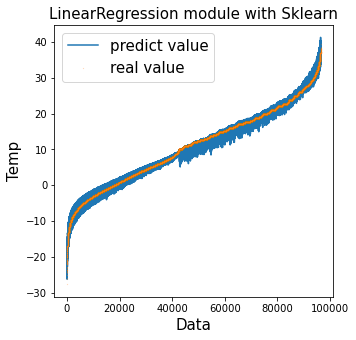

In [15]:
plt.figure(figsize = (5, 5))
plt.title('LinearRegression', fontsize = 15)
plt.xlabel('Data', fontsize = 15)
plt.ylabel('Temp', fontsize = 15)
plt.plot(regression.predict(X),label = 'Predict value')
plt.plot(y,'o', markersize = 0.1,  label = 'Real value')
plt.legend(fontsize = 15)
plt.show()